In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import utils
from matplotlib import pyplot as plt
# from PIL import Image

# to solve the issue of gpu memory lock
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
#------------------------------------------#

In [3]:
# load the dataset
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [4]:
print('Size of training images: {}'.format(x_train.shape))
print('Size of testing images: {}'.format(x_test.shape))

Size of training images: (50000, 32, 32, 3)
Size of testing images: (10000, 32, 32, 3)


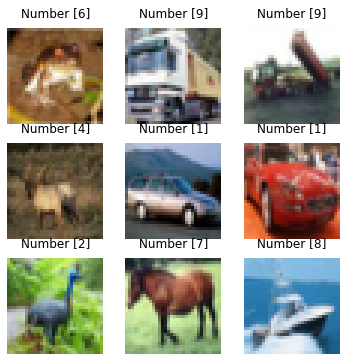

In [5]:
# create sbplots using matplotlib.pyplot and 
# populate the plots with data
fig, axs = plt.subplots(3, 3, figsize=(6, 6))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

In [6]:
# preprocessing the dataset
tf.keras.backend.set_floatx('float64')
seed = 1
np.random.seed(seed)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [7]:
# one hot encoding
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_class = y_test.shape[1]

print(y_train.shape)
print(y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras import Model

In [9]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = Conv2D(96, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(96, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(96, (3, 3), padding='same', strides=(2, 2))(x)
x = Dropout(0.5)(x)

x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(2, 2))(x)
x = Dropout(0.5)(x)

x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(192, (1, 1), padding='valid', activation='relu')(x)
x = Conv2D(10, (1, 1), padding='valid')(x)
x = GlobalAveragePooling2D()(x)

outputs = Activation('softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="all_cnn")

In [10]:
print(model.summary())

Model: "all_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       3319

In [11]:
# make a loss object and optimizer
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss=loss_object, metrics=['accuracy'])

# parametrers
EPOCHS = 50
batch_size = 64

In [12]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=batch_size)

Epoch 1/50
782/782 [==============================] - 456s 583ms/step - loss: 2.0395 - accuracy: 0.2321 - val_loss: 1.7912 - val_accuracy: 0.3268
Epoch 2/50
782/782 [==============================] - 455s 582ms/step - loss: 1.6460 - accuracy: 0.3867 - val_loss: 1.5152 - val_accuracy: 0.4320
Epoch 3/50
782/782 [==============================] - 461s 589ms/step - loss: 1.4076 - accuracy: 0.4851 - val_loss: 2.0500 - val_accuracy: 0.4097
Epoch 4/50
782/782 [==============================] - 466s 596ms/step - loss: 1.2281 - accuracy: 0.5564 - val_loss: 1.2557 - val_accuracy: 0.5670
Epoch 5/50
782/782 [==============================] - 467s 597ms/step - loss: 1.0772 - accuracy: 0.6134 - val_loss: 1.3466 - val_accuracy: 0.5461
Epoch 6/50
782/782 [==============================] - 467s 597ms/step - loss: 0.9678 - accuracy: 0.6544 - val_loss: 0.9288 - val_accuracy: 0.6730
Epoch 7/50
782/782 [==============================] - 467s 597ms/step - loss: 0.8806 - accuracy: 0.6884 - val_loss: 0.8358 -

In [13]:
model.save('Epochs_50.h5') 

In [14]:
!mkdir -p saved_model
model.save('saved_model/Epochs_50') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/Epochs_50/assets


In [15]:
model.save_weights('./checkpoints/Epochs_50')